In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib 
from tqdm import tqdm
from statistics import mean
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
trainData = pd.read_csv("../Data/train.csv", index_col = 0)
testData = pd.read_csv("../Data/test.csv", index_col = 0)
mean_value = trainData['Age'].mean()
trainData['Age'] = trainData['Age'].fillna(trainData['Age'].mean())
testData['Fare'] = testData['Fare'].fillna(testData['Fare'].mean())
testData['Embarked'] = testData['Embarked'].dropna(axis = 0)

testData = testData.dropna(subset = ['Embarked'])
trainData = trainData.dropna(subset = ['Embarked'])
trainData.shape

(889, 11)

In [3]:
xTrain = trainData[["Pclass", "SibSp", "Parch", "Fare","Embarked","Sex","Name","Age"]]
yTrain = trainData["Survived"]
xTest = testData[["Pclass", "SibSp", "Parch", "Fare","Embarked","Sex", "Name","Age"]]

In [4]:
print(xTrain.head())

             Pclass  SibSp  Parch     Fare Embarked     Sex  \
PassengerId                                                   
1                 3      1      0   7.2500        S    male   
2                 1      1      0  71.2833        C  female   
3                 3      0      0   7.9250        S  female   
4                 1      1      0  53.1000        S  female   
5                 3      0      0   8.0500        S    male   

                                                          Name   Age  
PassengerId                                                           
1                                      Braund, Mr. Owen Harris  22.0  
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0  
3                                       Heikkinen, Miss. Laina  26.0  
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0  
5                                     Allen, Mr. William Henry  35.0  


In [5]:
xTrain['Title'] = xTrain['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
xTest['Title'] = xTest['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

xTest.drop(["Name"],axis = 1, inplace = True)
xTrain.drop(["Name"],axis = 1, inplace = True)

c:\users\nimro\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\nimro\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\nimro\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [6]:
# Substitute rare female titles
xTrain['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
xTest['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
# Substitute rare male titles
xTrain['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)
xTest['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)

c:\users\nimro\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [7]:
print(xTrain.head())

             Pclass  SibSp  Parch     Fare Embarked     Sex   Age Title
PassengerId                                                            
1                 3      1      0   7.2500        S    male  22.0    Mr
2                 1      1      0  71.2833        C  female  38.0   Mrs
3                 3      0      0   7.9250        S  female  26.0  Miss
4                 1      1      0  53.1000        S  female  35.0   Mrs
5                 3      0      0   8.0500        S    male  35.0    Mr


In [8]:
LE = LabelEncoder()
xTrain['Title'] = LE.fit_transform(xTrain['Title'])
xTrain['Embarked'] = LE.fit_transform(xTrain['Embarked'])
xTrain['Sex'] = LE.fit_transform(xTrain['Sex'])


xTest['Title'] = LE.fit_transform(xTest['Title'])
xTest['Embarked'] = LE.fit_transform(xTest['Embarked'])
xTest['Sex'] = LE.fit_transform(xTest['Sex'])

c:\users\nimro\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\nimro\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\nimro\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is try

In [9]:
print(xTest.head())

             Pclass  SibSp  Parch     Fare  Embarked  Sex   Age  Title
PassengerId                                                           
892               3      0      0   7.8292         1    1  34.5      3
893               3      1      0   7.0000         2    0  47.0      4
894               2      0      0   9.6875         1    1  62.0      3
895               3      0      0   8.6625         2    1  27.0      3
896               3      1      1  12.2875         2    0  22.0      4


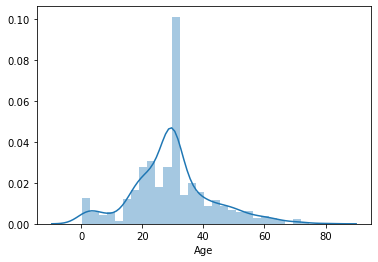

In [10]:
# SD for Age
ageSD = trainData["Age"].std()
ax = sns.distplot(trainData["Age"])

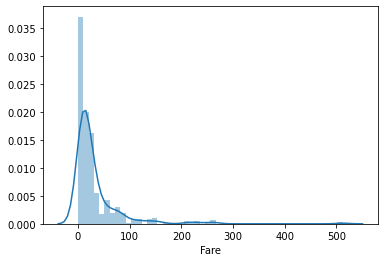

In [11]:
# SD for Fare
fareSD = trainData["Fare"].std()
a = sns.distplot(trainData["Fare"])

In [20]:
#remove outliers 2 SD from the mean for Age and Fare
ageMean = trainData["Age"].mean()
fareMean = trainData["Fare"].mean()
# print(ageMean - (ageSD * 2)) 3.7410158231375483
# print(ageMean + (ageSD * 2)) 55.61448106014683
dropList = []
for index, row in trainData.iterrows():
    if (row["Age"] >= ageMean + (ageSD * 2) or row["Age"] <= ageMean - (ageSD * 2)):
        dropList.append(index)

3.7410158231375483
55.61448106014683
[8, 12, 17, 34, 44, 55, 79, 95, 117, 120, 165, 171, 184, 194, 206, 233, 253, 262, 269, 276, 281, 298, 306, 327, 341, 349, 367, 375, 382, 387, 408, 439, 457, 468, 480, 484, 488, 494, 531, 546, 556, 571, 588, 626, 627, 631, 643, 648, 660, 673, 685, 695, 746, 756, 773, 789, 804, 825, 828, 832, 852, 880]


In [33]:
# dropping the rows that contain the outliers in the dataframe
trainData.drop(trainData.index[dropList],inplace=True,axis=0)

IndexError: index 825 is out of bounds for axis 0 with size 821

In [31]:
for index, row in trainData.iterrows():
    print(row["Age"])

22.0
38.0
26.0
35.0
35.0
29.69911764705882
54.0
2.0
14.0
4.0
58.0
39.0
14.0
55.0
2.0
31.0
29.69911764705882
35.0
34.0
15.0
28.0
8.0
38.0
29.69911764705882
19.0
29.69911764705882
29.69911764705882
40.0
29.69911764705882
29.69911764705882
66.0
42.0
29.69911764705882
21.0
18.0
14.0
40.0
27.0
29.69911764705882
3.0
29.69911764705882
29.69911764705882
29.69911764705882
29.69911764705882
18.0
7.0
21.0
49.0
29.0
65.0
21.0
28.5
5.0
11.0
22.0
45.0
4.0
29.69911764705882
29.69911764705882
29.0
19.0
17.0
26.0
32.0
16.0
21.0
26.0
32.0
25.0
29.69911764705882
29.69911764705882
0.83
30.0
29.0
29.69911764705882
28.0
17.0
33.0
16.0
29.69911764705882
23.0
24.0
29.0
20.0
46.0
26.0
59.0
29.69911764705882
23.0
34.0
28.0
29.69911764705882
21.0
33.0
37.0
28.0
21.0
29.69911764705882
38.0
29.69911764705882
47.0
14.5
22.0
20.0
17.0
21.0
70.5
29.0
2.0
21.0
32.5
32.5
54.0
12.0
29.69911764705882
24.0
29.69911764705882
45.0
33.0
20.0
47.0
29.0
25.0
23.0
19.0
37.0
16.0
24.0
29.69911764705882
22.0
24.0
19.0
18.0
19.0
2